# Introduction to Feature Engineering <font color='blue'> (10 min) </font>

# Google doc with code corrections is accessible at:
### https://docs.google.com/document/d/19Um3u0V7dekptT0NBE-ArPf0MHe74xQA_BMueBD0Vpw/edit?usp=sharing

# 0) Importing the right tools <font color='blue'> (5 min) </font>

### <font color='red'>0.1) Import the necessary packages: </font>

- pandas (aliased as pd)
- numpy (aliased as np)
- seaborn (aliased as sns)
- matplotlib.pyplot (aliased as plt)

In [2]:
from __future__ import division
#### IMPORT THE NECESSARY PACKAGES WITH THEIR ALIASES ####


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/Users/axa/.pyenv/versions/2.7.12/envs/DS/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### <font color='red'>0.2) Import the dataset from <i>'../data/data_after_collection_cleaning.csv'</i></font>

In [3]:
raw_data = pd.read_csv('./my_data_after_collection.csv')
data = raw_data.copy()

### <font color='red'>0.3) Print samples of data so you are familiar with the data </font>

In [4]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Precipitationmm,Conditions,TemperatureC,total_docks_start,total_docks_end
882959,561,2015-06-29 17:26:00,2015-06-29 17:36:00,407,Henry St & Poplar St,40.700469,-73.991454,395,Bond St & Schermerhorn St,40.68807,-73.984106,19473,Subscriber,1976.0,1,0.0,Scattered Clouds,24.4,37.0,30.0
516600,920,2015-06-18 07:22:00,2015-06-18 07:37:00,489,10 Ave & W 28 St,40.750664,-74.001768,510,W 51 St & 6 Ave,40.76066,-73.980420,18627,Subscriber,1992.0,1,0.0,Overcast,18.9,37.0,51.0


## 1) Week-end, Weekday <font color='blue'> (20 min) </font>

### Weekday

### <font color='red'>1.1) Import the <i>calendar</i> package and get help on it </font>

In [5]:
#### IMPORT THE PACKAGE ####
import calendar

In [6]:
#### CALL HELP ON IT ####
help(calendar)

Help on module calendar:

NAME
    calendar - Calendar printing functions

FILE
    /Users/axa/.pyenv/versions/2.7.12/lib/python2.7/calendar.py

DESCRIPTION
    Note when comparing these calendars to the ones printed by cal(1): By
    default, these calendars have Monday as the first day of the week, and
    Sunday as the last (the European convention). Use setfirstweekday() to
    set the first day of the week (0=Monday, 6=Sunday).

CLASSES
    exceptions.ValueError(exceptions.StandardError)
        IllegalMonthError
        IllegalWeekdayError
    
    class IllegalMonthError(exceptions.ValueError)
     |  # Exceptions raised for bad input
     |  
     |  Method resolution order:
     |      IllegalMonthError
     |      exceptions.ValueError
     |      exceptions.StandardError
     |      exceptions.Exception
     |      exceptions.BaseException
     |      __builtin__.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, month)
     |  
     |  __str__(sel

### <font color='red'>1.2) Run the following block, so it changes starttime and stoptime columns of <i>data</i> to the right <i>datetime</i> format </font>

In [7]:
data['starttime'] = pd.to_datetime(data['starttime'], format="%Y-%m-%d %H:%M")
data['stoptime'] = pd.to_datetime(data['stoptime'], format="%Y-%m-%d %H:%M")

In [8]:
data

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Precipitationmm,Conditions,TemperatureC,total_docks_start,total_docks_end
0,1338,2015-06-01 00:00:00,2015-06-01 00:22:00,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,0.07,Overcast,15.0,30.0,43.0
1,290,2015-06-01 00:00:00,2015-06-01 00:05:00,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,0.07,Overcast,15.0,27.0,31.0
2,634,2015-06-01 00:01:00,2015-06-01 00:11:00,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,0.07,Overcast,15.0,39.0,35.0
3,159,2015-06-01 00:01:00,2015-06-01 00:04:00,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,0.07,Overcast,15.0,43.0,39.0
4,1233,2015-06-01 00:02:00,2015-06-01 00:22:00,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,1979.0,0,0.07,Overcast,15.0,36.0,43.0
5,690,2015-06-01 00:03:00,2015-06-01 00:15:00,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,410,Suffolk St & Stanton St,40.720664,-73.985180,20857,Subscriber,1976.0,1,0.07,Overcast,15.0,43.0,35.0
6,766,2015-06-01 00:04:00,2015-06-01 00:17:00,346,Bank St & Hudson St,40.736529,-74.006180,2003,1 Ave & E 18 St,40.733812,-73.980544,15978,Subscriber,1976.0,1,0.07,Overcast,15.0,27.0,39.0
7,1160,2015-06-01 00:06:00,2015-06-01 00:25:00,512,W 29 St & 9 Ave,40.750073,-73.998393,445,E 10 St & Avenue A,40.727408,-73.981420,17306,Subscriber,1962.0,2,0.07,Overcast,15.0,27.0,42.0
8,550,2015-06-01 00:07:00,2015-06-01 00:16:00,525,W 34 St & 11 Ave,40.755942,-74.002116,447,8 Ave & W 52 St,40.763707,-73.985162,18392,Subscriber,1973.0,1,0.07,Overcast,15.0,39.0,31.0
9,545,2015-06-01 00:08:00,2015-06-01 00:17:00,403,E 2 St & 2 Ave,40.725029,-73.990697,439,E 4 St & 2 Ave,40.726281,-73.989780,16300,Subscriber,1958.0,1,0.07,Overcast,15.0,31.0,39.0


### <font color='red'>1.3) Run the following block with different day indexes, so you can see what <i>calendar.day_name[index_day]</i> returns </font>

In [10]:
index_day = 0
print calendar.day_name[index_day]

Monday


### <font color='red'>1.4) Run the following block so you get the day index of a given observation, as well as its week-day using <i>calendar</i></font>

In [11]:
example_observation = data.iloc[0] 
print example_observation.starttime.weekday()
print calendar.day_name[example_observation.starttime.weekday()]

0
Monday


### <font color='red'>1.5) Create a column in the dataframe, containing the day of the week of a given trip. You can use the following functions:</font>
- pd.column_name.apply()
- calendar.day_name[day_number_here] (notice the brackets)
- datetime.weekday()

<font color='green'> <b>Any function can be passed to pd.column_name.apply(name_of_your_function), for instance you could use the <i>lambda functions</i></b>:
- new_column = pd.column_name.apply(lambda x: x.attribute_of_x) will create a new column, based on the attributes of elements of the old column.<font color='green'>

In [19]:
data['start_day'] = data.starttime.apply(lambda x: calendar.day_name[x.weekday()])

### <font color='red'>1.6) Print samples of data to make sure the column has been created successfully </font>

In [20]:
data.sample(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,Precipitationmm,Conditions,TemperatureC,total_docks_start,total_docks_end,start_day
344165,1451,2015-06-12 14:46:00,2015-06-12 15:10:00,195,Liberty St & Broadway,40.709056,-74.010434,285,Broadway & E 14 St,40.734546,...,20379,Subscriber,1984.0,2,0.0,Haze,30.0,45.0,47.0,Friday
609710,791,2015-06-20 23:18:00,2015-06-20 23:31:00,509,9 Ave & W 22 St,40.745497,-74.001971,515,W 43 St & 10 Ave,40.760094,...,22074,Subscriber,1979.0,1,0.0,Overcast,20.3,36.0,35.0,Saturday
280673,328,2015-06-10 18:42:00,2015-06-10 18:47:00,435,W 21 St & 6 Ave,40.741740,-73.994156,521,8 Ave & W 31 St,40.750967,...,21568,Subscriber,1973.0,1,0.0,Clear,26.1,47.0,39.0,Wednesday


### <font color='red'>1.7) Use the <i>seaborn</i> package, and more specifically <i>sns.countplot</i>, to plot the number of trips per week day</font>

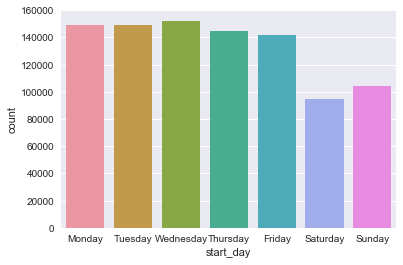

In [21]:
sns.countplot('start_day',data=data)

### <font color='red'>1.8) Define a new binary column, with True if day is on the week-end, False otherwise. You can use the <i>pandas.column_name.apply(your_function_here)</i> function.</font>

In [24]:
data['is_weekend'] = data['start_day'].apply(lambda x: x in ['Saturday','Sunday'])

### <font color='red'>1.9) Plot samples of data to check success of operation</font>

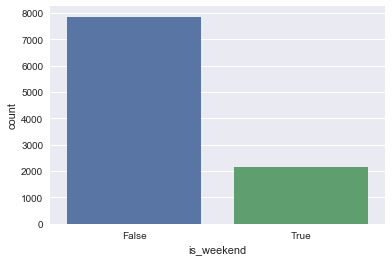

In [26]:
sns.countplot('is_weekend',data=data.sample(10000))

## 2) Morning/afternoon/evening/night <font color='blue'> (15 min) </font>

### <font color='red'>2.1) Define a function that returns a string depending on its parameter x. If:</font>
- x.hour is strictly under 6 or strictly over 22, return 'night'
- x.hour is strictly over 18 and under 22, return 'evening'
- x.hour is strictly over 12 and under 18, return 'afternoon'
- otherwise return 'morning'

In [29]:
def time_of_day(x):
    if x.hour < 6 or x.hour > 22:    #### COMPLETE THE FUNCTION BELOW ####
        return 'night'
    elif x.hour > 18 and x.hour <= 22 :
        return 'evening'
    elif x.hour > 12 and x.hour <= 18:
        return 'afternoon'
    else:
        return 'morning' 

### <font color='red'>2.2) Apply the function to the <i>starttime</i> column of <i>data</i> to create a new feature , using <i>pd.apply(your_function)</i> function</font>

In [31]:
data['start_moment'] =data.starttime.apply(lambda x:time_of_day(x))

### <font color='red'>2.3) Use <i>seaborn.countplot()</i> to plot the number of trips per moment of the day, with axes labels, and a title</font>

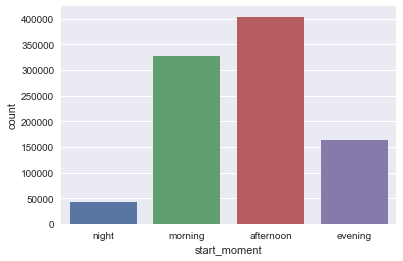

In [33]:
sns.countplot('start_moment',data=data)

### <font color='red'>2.4) Use <i>seaborn.countplot()</i> to plot the number of trips per weekday and per time of day</font>

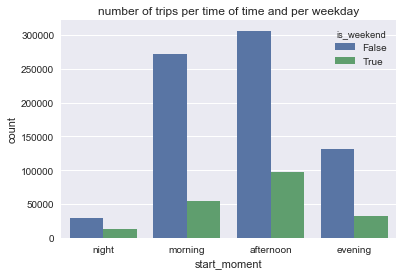

In [37]:
sns.countplot(x='start_moment' ,hue='is_weekend',data=data)
plt.title('number of trips per time of time and per weekday')

## 3) Is rainy <font color='blue'> (5 min) </font>

### <font color='red'>3.1) Define a new binary column, with True if day is rainy, False otherwise. You can use the <i>pandas.column_name.apply()</i> function on the <i>Conditions</i> column of the dataframe</font>
- Hint : you can use a <b>lambda function</b> such as : <i>lambda condition: 'Rain' in condition</i>

In [39]:
set(data.Conditions)

{'Clear',
 'Haze',
 'Heavy Rain',
 'Light Rain',
 'Mostly Cloudy',
 'Overcast',
 'Partly Cloudy',
 'Rain',
 'Scattered Clouds'}

In [40]:
data['is_rainy'] = data.Conditions.apply(lambda x:x == 'Rain')

### <font color='red'>3.2) Print <i>samples</i> of data to check if the operation was successful</font>

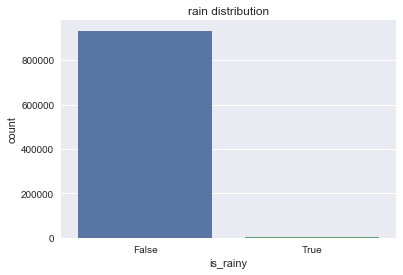

In [41]:
sns.countplot(x='is_rainy',data=data)
plt.title('rain distribution')

## 4) Is circle trip <font color='blue'> (5 min) </font>

### <font color='red'>4.1) Define a new binary column, with 1 if trip was loopy, 0 otherwise. You can use a boolean comparison of two columns of the dataframe:</font>

- example of boolean condition : <b>data.column_1 == data.column_2</b>

In [46]:
data['is_circle_trip'] = data['end station id'] == data['start station id']

### <font color='red'>4.2) Print the proportion of circle trips in the dataset</font>

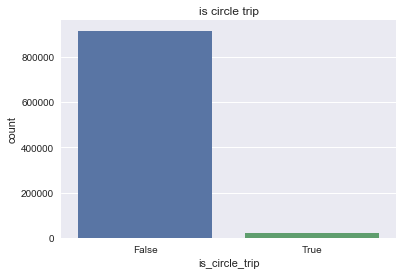

In [47]:
sns.countplot(x='is_circle_trip',data=data)
plt.title('is circle trip')

## 5) Understanding trip evolution in June <font color='blue'> (15 min) </font>

### <font color='red'>5.1) Add a new column with the trip day number. Since all trips in the dataset occured in June, we will name this column "june_day". You can use the <i>datetime.day</i> attribute of the starttime</font>

In [63]:
data['june_day'] = data.starttime.apply(lambda x: x.day)

(array([  61640.,   89899.,   98981.,  111393.,   82416.,  105232.,
          86173.,  110484.,   93287.,   96130.]),
 array([  1. ,   3.9,   6.8,   9.7,  12.6,  15.5,  18.4,  21.3,  24.2,
         27.1,  30. ]),
 <a list of 10 Patch objects>)

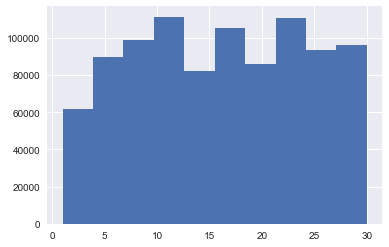

In [64]:
plt.hist(data['june_day'])

### <font color='red'>5.2) Group by the columns with respect to day in June, using <i>data.groupby()</i></font>

In [65]:
grouped_by_data = data.groupby(data['june_day'])

### <font color='red'>5.3) Aggregate the grouped by data with respect to mean temperature, and number of trips, using the <i>.count()</i> and <i>.mean()</i> methods of <i>data.groupby()</i></font>

In [74]:
aggregate_count_trips = grouped_by_data.count()
aggregate_temperature = grouped_by_data.mean()

### <font color='red'>5.4) Understand what the code below does. How do you understand the plots ? You can look up the following functions:</font>
- fig, ax1 = plt.subplots()
- ax2=ax1.twinx()
- ax1.plot(), ax2.plot()
- any other options to set the ticks labels, colors, titles ...

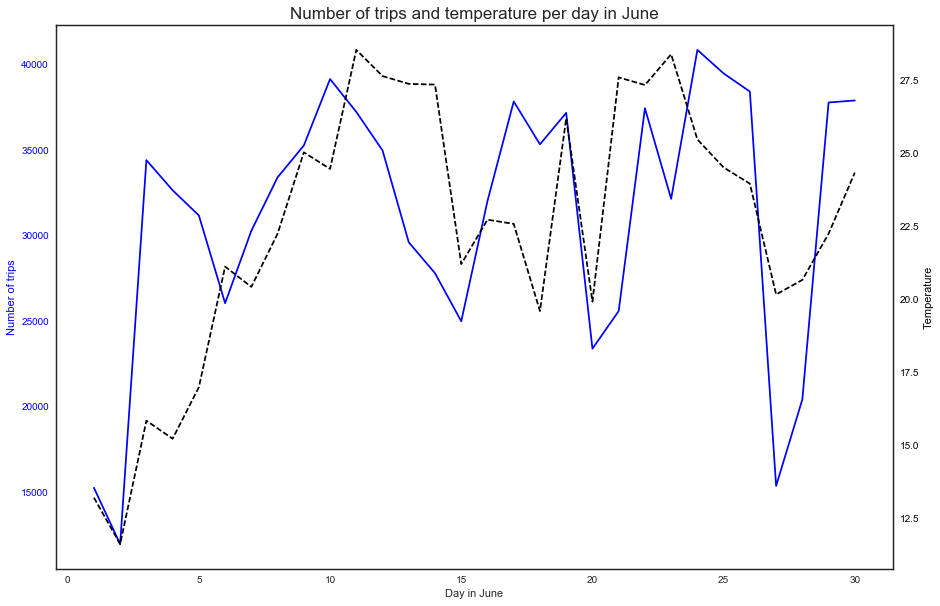

In [75]:
sns.set_style('white')

fig, ax1 = plt.subplots(figsize=(15,10))

june_day = aggregate_count_trips.index

number_trips = aggregate_count_trips.tripduration
ax1.plot(june_day, number_trips, 'b')
ax1.set_xlabel('Day in June')
for ticklabel in ax1.get_yticklabels():
    ticklabel.set_color('b')
ax1.set_ylabel('Number of trips',color='b')

ax2 = ax1.twinx()
temperature = aggregate_temperature.TemperatureC
ax2.plot(june_day, temperature, 'k--')
for ticklabel in ax2.get_yticklabels():
    ticklabel.set_color('k')
ax2.set_ylabel('Temperature',color='k')
plt.title('Number of trips and temperature per day in June', fontsize=17)
plt.show()

## 6) Trip distances and speeds <font color='blue'> (15 min) </font>

### <font color='red'>Import the haversine package, that computes the haversine distance from one coordinate to another</font>

In [77]:
from haversine import haversine
help(haversine)

Help on function haversine in module haversine:

haversine(point1, point2, miles=False)
    Calculate the great-circle distance bewteen two points on the Earth surface.
    
    :input: two 2-tuples, containing the latitude and longitude of each point
    in decimal degrees.
    
    Example: haversine((45.7597, 4.8422), (48.8567, 2.3508))
    
    :output: Returns the distance bewteen the two points.
    The default unit is kilometers. Miles can be returned
    if the ``miles`` parameter is set to True.



### <font color='red'>Understand how the <i>haversine</i> function from the package can be used to compute a distance by running the following blocks</font>

In [78]:
x = data.iloc[0]

In [79]:
print 'Traveled haversine distance for trip 0: {:.1f} kilometers'.format(
    haversine((x['start station latitude'], x['start station longitude']),
              (x['end station latitude'], x['end station longitude'])))

Traveled haversine distance for trip 0: 3.8 kilometers


### <font color='red'>6.1) Complete the following function so it returns, for a given observation, the haversine distance from a start station to the end station</font>

In [80]:
def distance_stations(x):
    start_lat = x['start station latitude']
    start_long = x['start station longitude']
    end_lat = x['end station latitude']
    end_long = x['end station longitude']
    return haversine((start_lat,start_long),(end_lat,end_long))

### <font color='red'>6.2) What does the following block do ? It may take a minute or two to run</font>

In [81]:
data['traveled_distance'] = data.apply(distance_stations, axis=1)

### <font color='red'>6.3) Show <i>samples</i> of data, and see how the traveled distance has been added as a new feature in the dataset</font>

(array([  2.91406000e+05,   3.57328000e+05,   1.57880000e+05,
          7.12000000e+04,   3.18940000e+04,   1.53670000e+04,
          7.74100000e+03,   2.40400000e+03,   3.72000000e+02,
          4.30000000e+01]),
 array([ 0.        ,  0.9932952 ,  1.98659041,  2.97988561,  3.97318081,
         4.96647602,  5.95977122,  6.95306642,  7.94636162,  8.93965683,
         9.93295203]),
 <a list of 10 Patch objects>)

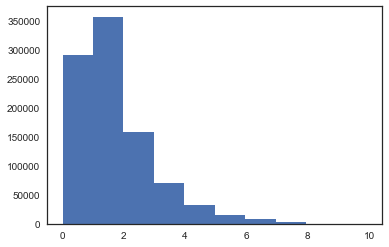

In [82]:
plt.hist(data['traveled_distance'])

### <font color='red'>6.4) Compute the average speed (in km/h) by dividing two dataframe columns</font>

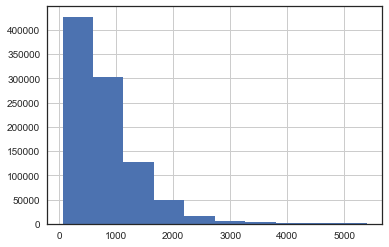

In [104]:
data['tripduration'].hist()

In [105]:
data['average_speed'] = data['traveled_distance'] / (data['tripduration']/3600.0)

(array([  9.35527000e+05,   6.80000000e+01,   1.80000000e+01,
          6.00000000e+00,   7.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([   0.        ,   28.06548521,   56.13097043,   84.19645564,
         112.26194086,  140.32742607,  168.39291129,  196.4583965 ,
         224.52388172,  252.58936693,  280.65485214]),
 <a list of 10 Patch objects>)

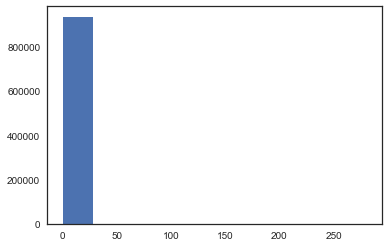

In [107]:
plt.hist(data['average_speed'])

### <font color='red'>Run the following block to compute the mean speed on non-loopy trips </font>

In [108]:
mean_speed = mean(data['average_speed'][data['average_speed'] != 0])

### <font color='red'>6.5) Keep only trips for which the speed is under 50 km/h </font>

In [111]:
data = data[data.average_speed<50]

### <font color='red'>What does the following block do ?</font>

In [112]:
data.loc[data['average_speed']==0,'average_speed'] = mean_speed

/Users/axa/.pyenv/versions/2.7.12/envs/DS/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### <font color='red'>6.7) Using <i>seaborn.distplot</i>, plot the distribution of speeds</font>

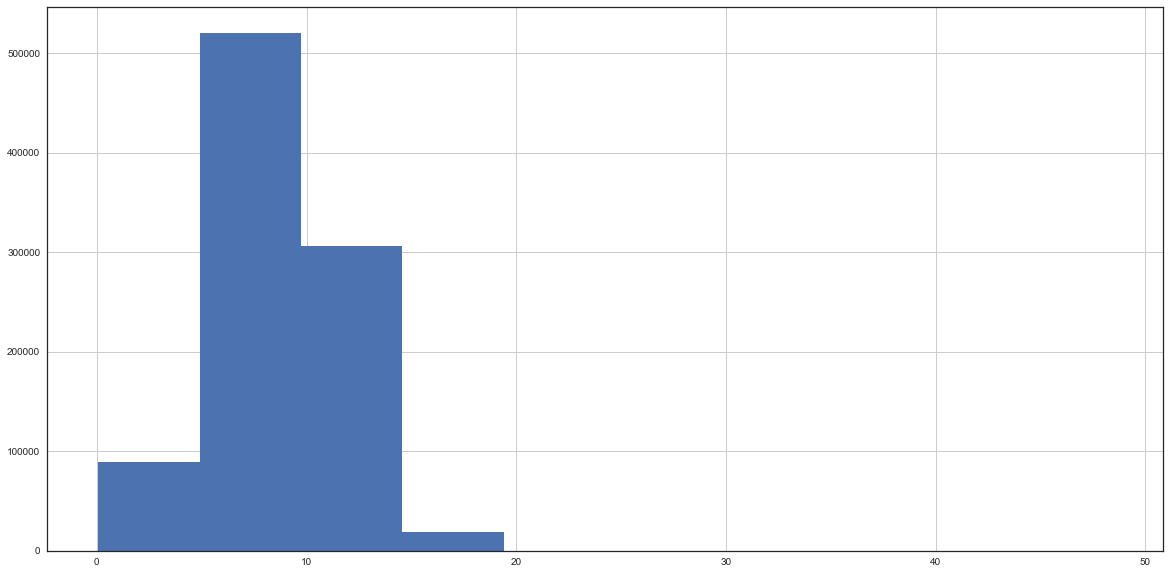

In [113]:
plt.figure(figsize=(20,10))
#### PLOT THE DISTRIBUTION OF SPEEDS ####

data['average_speed'].hist()

### <font color='red'>6.8) Subsidiary question : plot the average speed vs. the total distance. What do you observe ? You can use the following function: </font>
- seaborn.regplot()
- data_sample = data.sample(1000) so as not to overload the graph

In [120]:
data_bis = data.sample(1000)

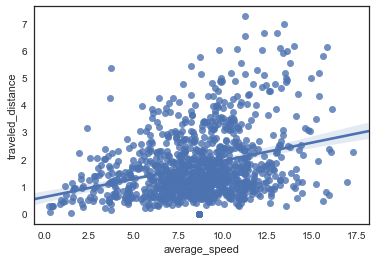

In [123]:
sns.regplot(data_bis.average_speed,data_bis.traveled_distance)

# Save dataset to csv file

In [124]:
data.to_csv('my_data_after_feature_engineering.csv', index=False)

# 7) Imagine and build your own features !